In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from sklearn.decomposition import PCA

In [2]:
bigv = pd.read_csv("./data/data.csv")
bigv

,EXT,EST,AGR,CSN,OPN
0,4.6,2.4,3.5,3.0,4.5
1,2.0,2.5,4.2,3.7,3.5
2,2.5,2.6,4.0,3.2,4.1
3,2.6,2.9,3.6,2.5,3.9
4,2.9,1.9,4.2,4.4,4.8
...,...,...,...,...,...
1015336,3.4,3.3,3.6,2.9,3.3
1015337,3.2,4.4,3.7,2.8,4.5
1015338,3.9,2.9,3.1,2.1,4.8
1015339,2.2,3.5,3.7,3.6,4.1


A short example with hierarchical clustering, I will only use 1000 observations. It's quadratic in term of complexity, so it does not scale well

In [3]:
n = 200
big_short = bigv.loc[0:n]

We define a distance between two answers; here we use the euclidian distance

In [4]:
def dist(asw1, asw2):
    # input : 
    # asw1 the first answer a 5-uplet (ext, est, agr, csn, opn)
    # asw2 the second answer a 5-uplet (ext, est, agr, csn, opn)
    # output :
    # the distance between asw1 and asw2
    return np.sqrt((asw1[0]-asw2[0])**2+(asw1[1]-asw2[1])**2+(asw1[2]-asw2[2])**2+(asw1[3]-asw2[3])**2+(asw1[4]-asw2[4])**2)

In [5]:
dist(big_short.loc[0], big_short.loc[1])

2.9580398915498076

The distance between the first and the second answer is 2.95

We then compute all distances, and store it in a matrix.

In [6]:
mat = [[dist(big_short.loc[i], big_short.loc[j]) for i in range(n+1)] for j in range(n+1)]

<ipython-input-7-c4fbfc0a9e3c>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  links = linkage(df, method="ward")
/home/llesoil/anaconda3/envs/cours/lib/python3.8/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/llesoil/anaconda3/envs/cours/lib/python3.8/site-packages/seaborn/matrix.py:594: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


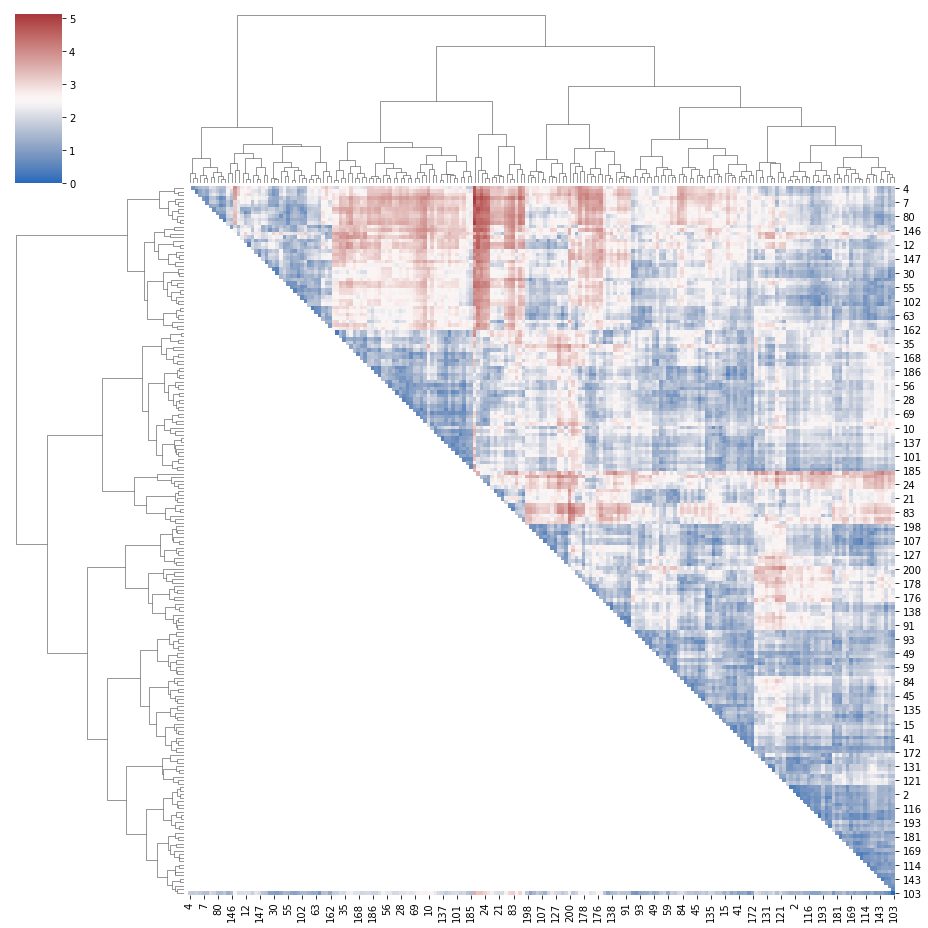

In [7]:
df = pd.DataFrame(mat)

links = linkage(df, method="ward")
order = leaves_list(links)

mask = np.zeros_like(mat, dtype=np.bool)

for i in range(n):
    for j in range(n):
        if i>=j:
            mask[order[i]][order[j]] = True

sns.clustermap(df, cmap="vlag", mask=mask, method="ward",
               linewidths=0, figsize=(13, 13), vmin =0)
plt.show()

If answers i and j are different, the square between lines i and j will be red.

If they are similar, the distance will be low, and the color of the square will be blue.

Hierarchical clustering sorts the data to form groups of answers.

We cut the tree to form three clusters of answers.

In [8]:
groups = cut_tree(links, n_clusters = 5)

In [9]:
pca = PCA(n_components=2)
pca.fit(big_short)
res_pca = pca.transform(big_short)
res_pca

array([[-1.57661987e+00,  4.89617859e-01],
       [ 2.82356063e-01, -1.25431763e+00],
       [-3.26388553e-03, -7.17462433e-01],
       [ 2.82503895e-01, -2.34111420e-01],
       [-9.60372637e-01, -1.35296044e+00],
       [-7.96671904e-01, -7.43615343e-01],
       [-5.58400766e-01,  2.41916770e-01],
       [-1.85204961e+00, -7.67895942e-01],
       [-3.03241105e-01,  1.07529267e-01],
       [ 1.17185052e+00, -2.56905452e-01],
       [ 6.76921645e-01,  7.96965553e-01],
       [ 2.30066490e-01,  1.44638197e+00],
       [-1.62923725e+00,  6.29373964e-01],
       [ 2.42703036e+00, -7.21727633e-01],
       [ 1.57472221e+00, -2.01106705e-01],
       [ 4.44109927e-01,  2.54385566e-01],
       [ 1.27407394e+00, -9.87767500e-02],
       [-1.30475569e+00, -4.82141102e-02],
       [-1.38676901e+00,  2.83169535e-01],
       [-2.47220289e-01,  1.26629203e+00],
       [ 1.22427440e+00,  2.51653800e-01],
       [ 6.24765573e-01,  1.45135284e-01],
       [ 3.68502411e-01, -1.35808241e+00],
       [-1.

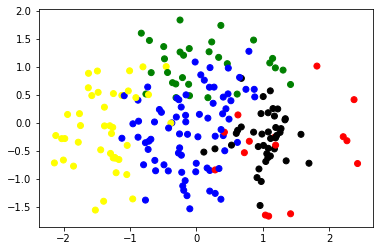

In [10]:
colors = ['yellow', 'blue', 'red', 'black', 'green']

plt.scatter([res_pca[i][0] for i in range(len(res_pca))],
            [res_pca[i][1] for i in range(len(res_pca))],
            color = [colors[i[0]] for i in groups])
plt.show()

In [14]:
big_short['groups'] = [colors[i[0]] for i in groups]

<ipython-input-14-d1477d09d1fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_short['groups'] = [colors[i[0]] for i in groups]


In [15]:
big_short.groupby("groups").mean()

,EXT,EST,AGR,CSN,OPN
groups,,,,,
black,2.150000,3.647500,3.525000,3.270000,4.025000
blue,3.054667,2.961333,3.768000,3.188000,3.865333
green,3.676667,3.986667,3.736667,2.973333,4.136667
red,1.906667,3.400000,2.766667,2.793333,3.400000
yellow,4.056098,2.156098,3.858537,3.312195,3.919512
